In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Matplotlib is building the font cache; this may take a moment.


In [7]:
df = pd.read_csv('mymoviedb (1).csv', lineterminator='\n')
df.head()


,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [9]:
df['Genre'].head()



0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [10]:
df.duplicated().sum()

0

In [11]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [12]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])
df['Year'] = df['Release_Date'].dt.year


In [13]:
df_cleaned = df.drop(['Overview','Poster_Url'], axis=1)


In [14]:
# split the genres into separate rows
df_genres = df_cleaned.assign(Genre=df_cleaned['Genre'].str.split(', ')).explode('Genre')


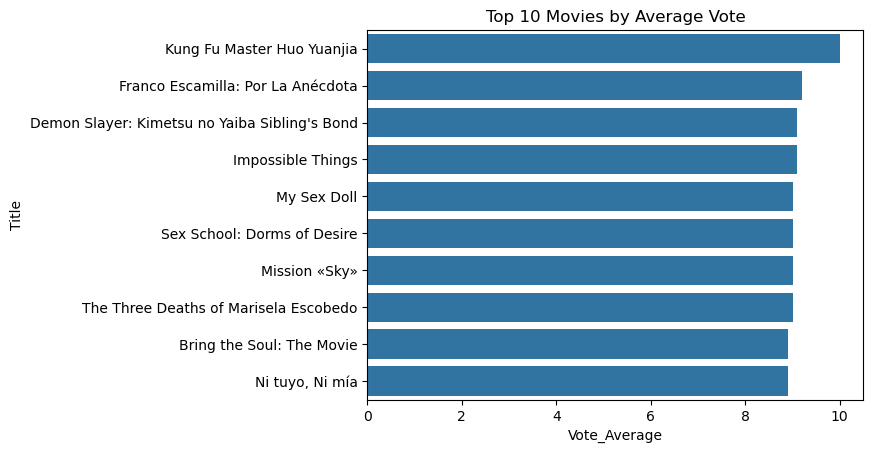

In [15]:
top_movies = df_cleaned.sort_values(by='Vote_Average', ascending=False).head(10)

sns.barplot(x='Vote_Average', y='Title', data=top_movies)
plt.title("Top 10 Movies by Average Vote")
plt.show()


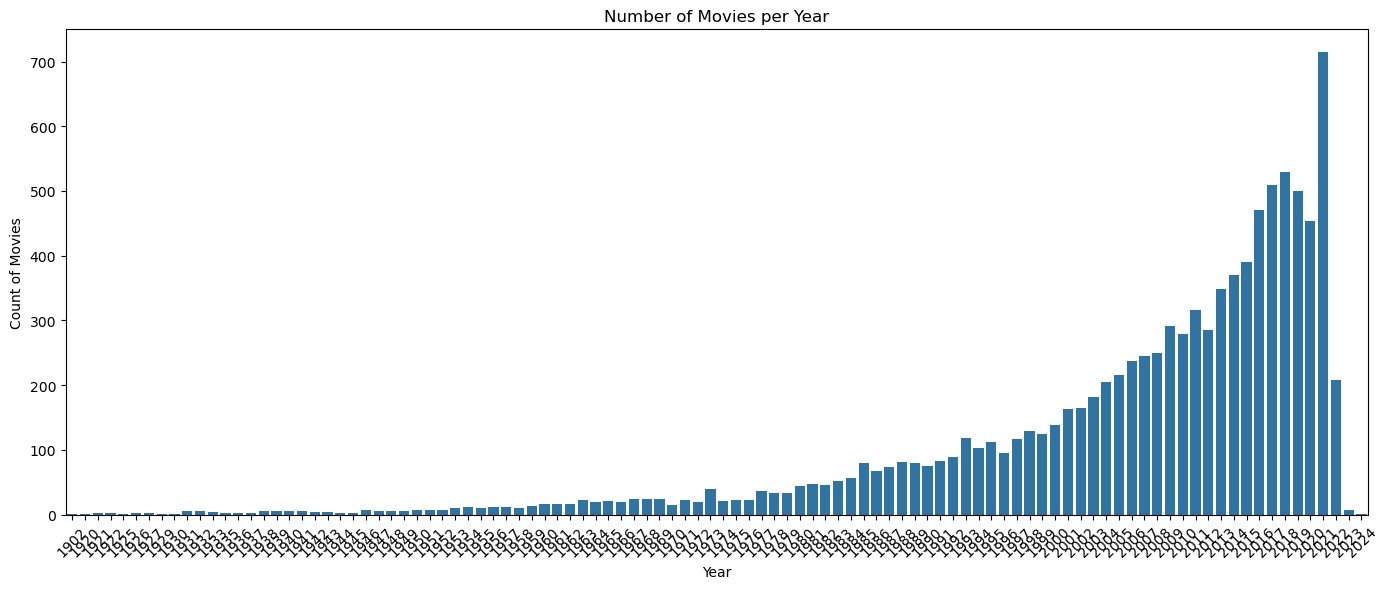

In [17]:
plt.figure(figsize=(14,6))

sns.countplot(
    x='Year',
    data=df_cleaned,
    order=sorted(df_cleaned['Year'].dropna().unique())
)

plt.xticks(rotation=45)
plt.title("Number of Movies per Year")
plt.xlabel("Year")
plt.ylabel("Count of Movies")

plt.tight_layout()
plt.show()


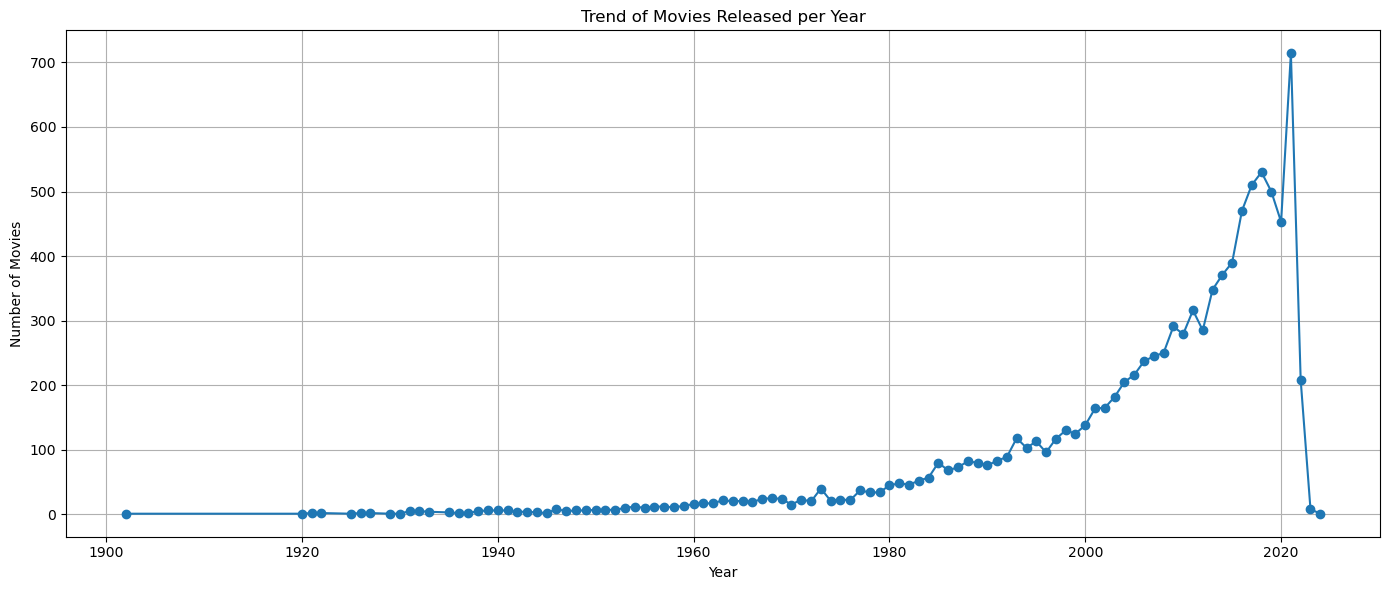

In [18]:
movies_per_year = df_cleaned['Year'].value_counts().sort_index()

plt.figure(figsize=(14,6))
plt.plot(movies_per_year.index, movies_per_year.values, marker='o')

plt.title("Trend of Movies Released per Year")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.grid(True)

plt.tight_layout()
plt.show()


In [19]:
most_frequent_genre = df_genres['Genre'].value_counts().idxmax()
print("Most Frequent Genre:", most_frequent_genre)

Most Frequent Genre: Drama


In [20]:
highest_voted_genre = (
    df_genres.groupby('Genre')['Vote_Average']
    .mean()
    .sort_values(ascending=False)
    .idxmax()
)
print("Genre with Highest Average Votes:", highest_voted_genre)

Genre with Highest Average Votes: History


In [21]:
highest_popularity_movie = df_cleaned.loc[
    df_cleaned['Popularity'].idxmax(),
    ['Title', 'Popularity', 'Genre']
]

lowest_popularity_movie = df_cleaned.loc[
    df_cleaned['Popularity'].idxmin(),
    ['Title', 'Popularity', 'Genre']
]

print("\nHighest Popularity Movie:")
print(highest_popularity_movie)

print("\nLowest Popularity Movie:")
print(lowest_popularity_movie)


Highest Popularity Movie:
Title                    Spider-Man: No Way Home
Popularity                              5083.954
Genre         Action, Adventure, Science Fiction
Name: 0, dtype: object

Lowest Popularity Movie:
Title         The United States vs. Billie Holiday
Popularity                                  13.354
Genre                        Music, Drama, History
Name: 9825, dtype: object


In [22]:
year_with_most_movies = df_cleaned['Year'].value_counts().idxmax()
print("\nYear with Most Movies:", year_with_most_movies)


Year with Most Movies: 2021


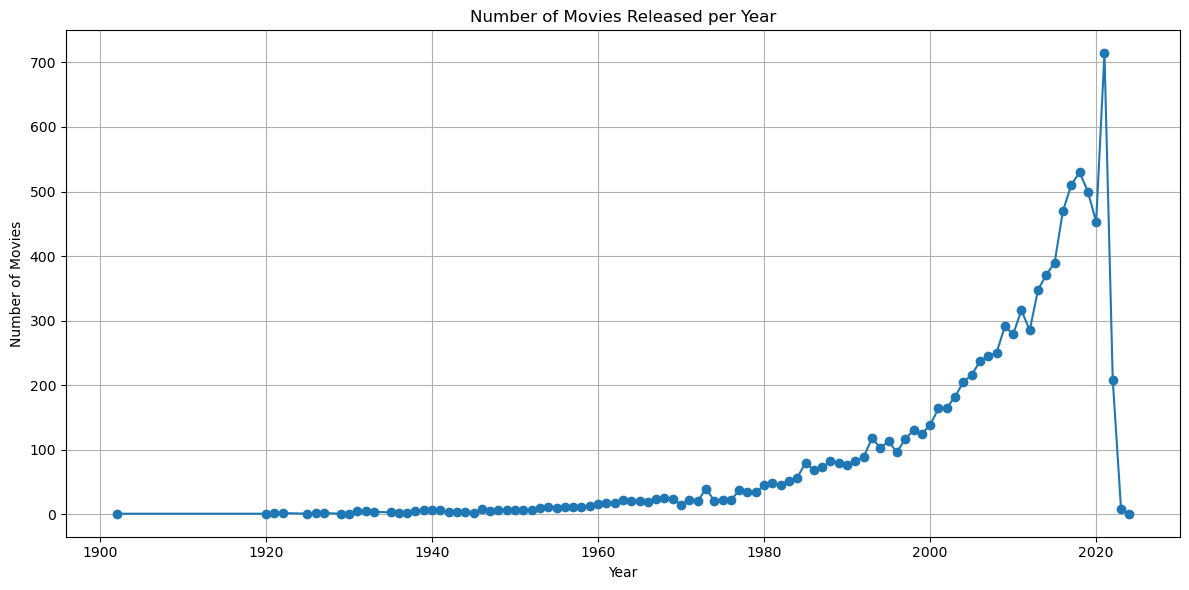

In [23]:
# Movies per year (clear trend)
movies_per_year = df_cleaned['Year'].value_counts().sort_index()

plt.figure(figsize=(12,6))
plt.plot(movies_per_year.index, movies_per_year.values, marker='o')
plt.title("Number of Movies Released per Year")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.grid(True)
plt.tight_layout()
plt.show()

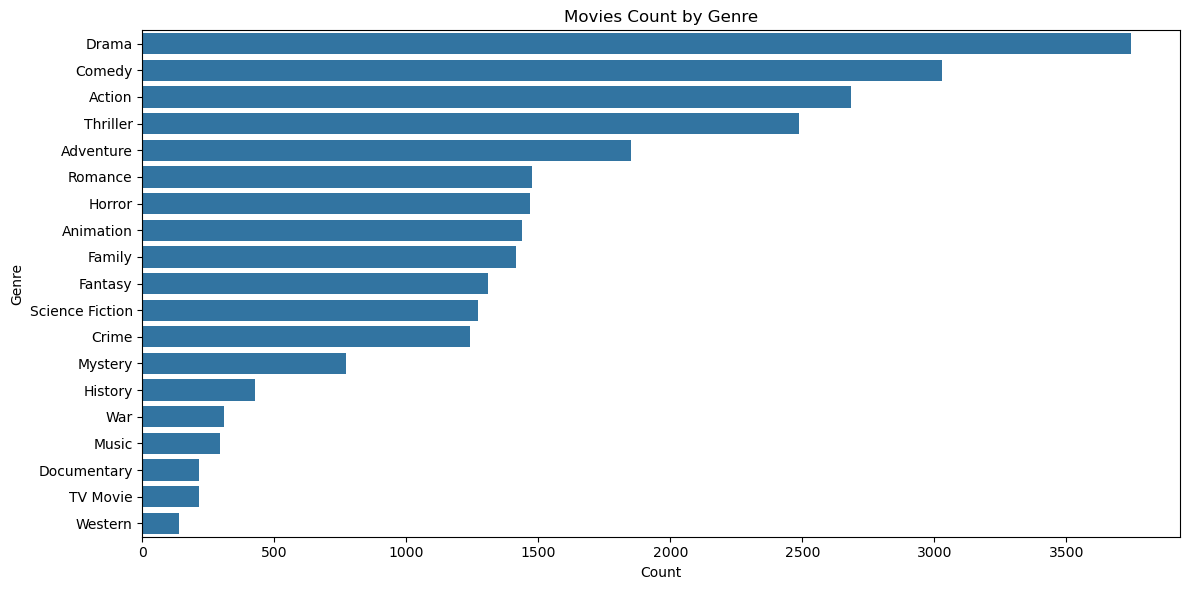

In [24]:
# Genre count
plt.figure(figsize=(12,6))
sns.countplot(
    y='Genre',
    data=df_genres,
    order=df_genres['Genre'].value_counts().index
)
plt.title("Movies Count by Genre")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

In [25]:
top_rated_movies = df_cleaned.sort_values(
    by='Vote_Average', ascending=False
).head(10)[['Title','Vote_Average','Genre']]

top_rated_movies

,Title,Vote_Average,Genre
9391,Kung Fu Master Huo Yuanjia,10.0,"Action, Drama"
7339,Franco Escamilla: Por La Anécdota,9.2,Comedy
667,Demon Slayer: Kimetsu no Yaiba Sibling's Bond,9.1,"Action, Animation, Fantasy"
2325,Impossible Things,9.1,"Family, Drama"
7401,My Sex Doll,9.0,"Comedy, Romance"
7014,Sex School: Dorms of Desire,9.0,Comedy
6728,Mission «Sky»,9.0,"Drama, War"
2391,The Three Deaths of Marisela Escobedo,9.0,"Documentary, Crime"
7039,Bring the Soul: The Movie,8.9,"Music, Documentary"
5069,"Ni tuyo, Ni mía",8.9,Drama


In [26]:
top_popular_movies = df_cleaned.sort_values(
    by='Popularity', ascending=False
).head(10)[['Title','Popularity','Genre']]

top_popular_movies


,Title,Popularity,Genre
0,Spider-Man: No Way Home,5083.954,"Action, Adventure, Science Fiction"
1,The Batman,3827.658,"Crime, Mystery, Thriller"
2,No Exit,2618.087,Thriller
3,Encanto,2402.201,"Animation, Comedy, Family, Fantasy"
4,The King's Man,1895.511,"Action, Adventure, Thriller, War"
5,The Commando,1750.484,"Action, Crime, Thriller"
6,Scream,1675.161,"Horror, Mystery, Thriller"
7,Kimi,1601.782,Thriller
8,Fistful of Vengeance,1594.013,"Action, Crime, Fantasy"
9,Eternals,1537.406,Science Fiction


In [27]:
avg_popularity_genre = (
    df_genres.groupby('Genre')['Popularity']
    .mean()
    .sort_values(ascending=False)
)

avg_popularity_genre.head(10)


Genre
Adventure          53.742888
Fantasy            53.081342
Animation          52.433848
Action             50.890133
Science Fiction    49.511334
Family             46.610616
Crime              44.747295
Thriller           42.946258
Mystery            40.093590
Horror             38.264498
Name: Popularity, dtype: float64

In [28]:
avg_vote_count_genre = (
    df_genres.groupby('Genre')['Vote_Count']
    .mean()
    .sort_values(ascending=False)
)

avg_vote_count_genre.head(10)


Genre
Adventure          2328.045872
Science Fiction    2239.179890
Fantasy            1928.088685
Action             1812.611690
Crime              1594.413043
Mystery            1528.169470
Thriller           1459.643891
War                1457.525974
Family             1447.400990
Drama              1373.262553
Name: Vote_Count, dtype: float64

In [29]:
avg_rating = df_cleaned['Vote_Average'].mean()

above_avg_movies = df_cleaned[
    df_cleaned['Vote_Average'] > avg_rating
][['Title','Vote_Average','Genre']]

above_avg_movies.head()

,Title,Vote_Average,Genre
0,Spider-Man: No Way Home,8.3,"Action, Adventure, Science Fiction"
1,The Batman,8.1,"Crime, Mystery, Thriller"
3,Encanto,7.7,"Animation, Comedy, Family, Fantasy"
4,The King's Man,7.0,"Action, Adventure, Thriller, War"
5,The Commando,6.6,"Action, Crime, Thriller"


In [30]:
correlation = df_cleaned[['Popularity','Vote_Average']].corr()
correlation


,Popularity,Vote_Average
Popularity,1.000000,0.053844
Vote_Average,0.053844,1.000000


In [31]:
df_cleaned['Original_Language'].value_counts().head(5)

Original_Language
en    7570
ja     645
es     339
fr     292
ko     170
Name: count, dtype: int64

In [32]:
movies_after_2015 = df_cleaned[df_cleaned['Year'] > 2015]
movies_after_2015.shape


(3394, 8)

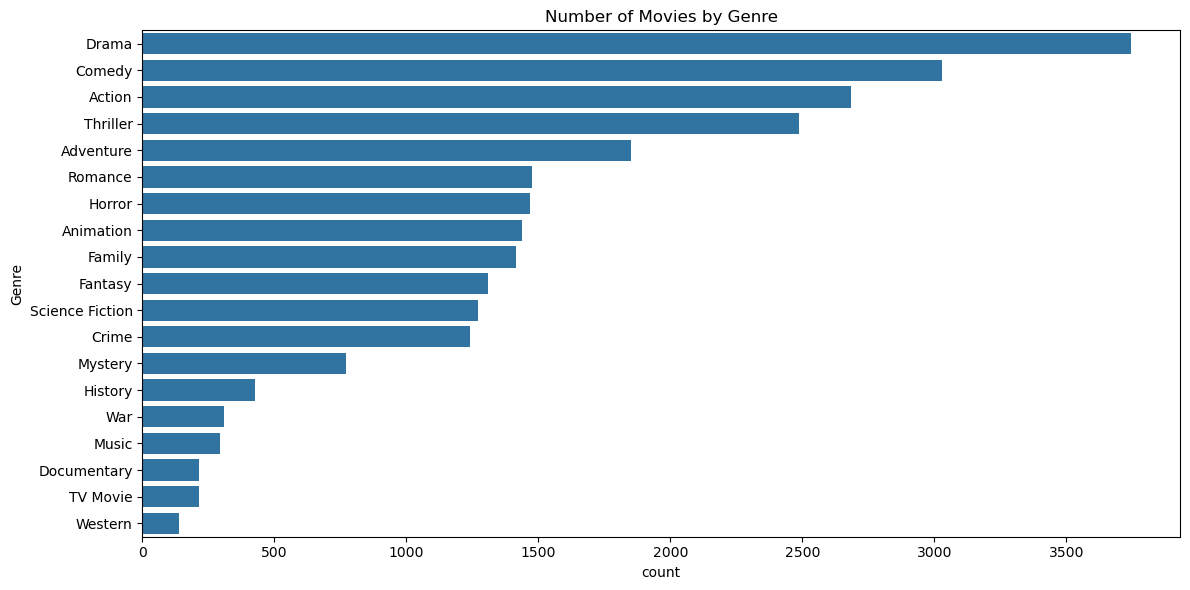

In [33]:
plt.figure(figsize=(12,6))
sns.countplot(
    y='Genre',
    data=df_genres,
    order=df_genres['Genre'].value_counts().index
)
plt.title("Number of Movies by Genre")
plt.tight_layout()
plt.show()


In [34]:
genre_year = (
    df_genres.groupby(['Year','Genre'])
    .size()
    .reset_index(name='Count')
)

top_genre_each_year = genre_year.loc[
    genre_year.groupby('Year')['Count'].idxmax()
]

top_genre_each_year.head()


,Year,Genre,Count
0,1902,Adventure,1
3,1920,Crime,1
8,1921,Drama,2
14,1922,Horror,2
15,1925,Drama,1


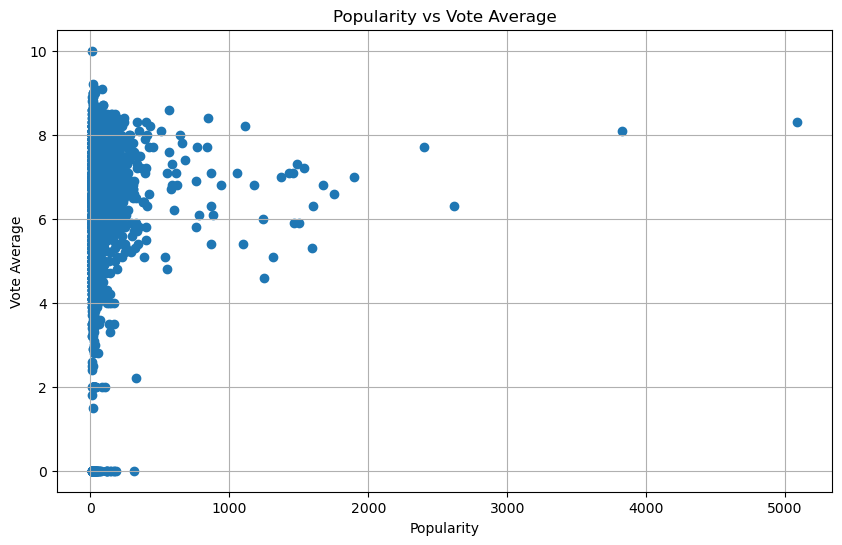

In [35]:
plt.figure(figsize=(10,6))
plt.scatter(df_cleaned['Popularity'], df_cleaned['Vote_Average'])
plt.xlabel("Popularity")
plt.ylabel("Vote Average")
plt.title("Popularity vs Vote Average")
plt.grid(True)
plt.show()


In [36]:
#PART 1: ADVANCED SQL-STYLE QUERIES (Using Pandas)

In [37]:
df_genres.groupby('Genre') \
    .agg(avg_rating=('Vote_Average','mean')) \
    .sort_values(by='avg_rating', ascending=False) \
    .head(5)


,avg_rating
Genre,
History,6.965574
War,6.948701
Music,6.879322
Animation,6.846560
Western,6.754745


In [39]:
#Movies with above-average popularity (SQL: SUBQUERY)
avg_popularity = df_cleaned['Popularity'].mean()

df_cleaned[df_cleaned['Popularity'] > avg_popularity][
    ['Title','Popularity','Genre']
].head()



,Title,Popularity,Genre
0,Spider-Man: No Way Home,5083.954,"Action, Adventure, Science Fiction"
1,The Batman,3827.658,"Crime, Mystery, Thriller"
2,No Exit,2618.087,Thriller
3,Encanto,2402.201,"Animation, Comedy, Family, Fantasy"
4,The King's Man,1895.511,"Action, Adventure, Thriller, War"


In [41]:
#year-wise movie count
df_cleaned.groupby('Year') \
    .size() \
    .reset_index(name='Total_Movies') \
    .sort_values(by='Total_Movies', ascending=False)



,Year,Total_Movies
98,2021,714
95,2018,530
94,2017,510
96,2019,500
93,2016,470
...,...,...
1,1920,1
8,1930,1
7,1929,1
4,1925,1


In [42]:
#Top movie per year by popularity (SQL: WINDOW FUNCTION)
df_cleaned.loc[
    df_cleaned.groupby('Year')['Popularity'].idxmax(),
    ['Year','Title','Popularity']
].sort_values('Year')



,Year,Title,Popularity
6084,1902,A Trip to the Moon,18.356
6336,1920,The Cabinet of Dr. Caligari,17.858
7903,1921,The Phantom Carriage,15.371
3219,1922,Nosferatu,28.638
5934,1925,Battleship Potemkin,18.663
...,...,...,...
28,2020,Demon Slayer -Kimetsu no Yaiba- The Movie: Mug...,845.992
0,2021,Spider-Man: No Way Home,5083.954
1,2022,The Batman,3827.658
210,2023,Fast & Furious 10,181.216


In [46]:
#Language-wise average rating
df_cleaned.groupby('Original_Language') \
    .agg(avg_rating=('Vote_Average','mean'),
         movie_count=('Title','count')) \
    .sort_values(by='avg_rating', ascending=False)



,avg_rating,movie_count
Original_Language,,
ms,7.700000,1
uk,7.650000,2
fa,7.566667,3
ar,7.450000,2
hu,7.333333,3
cs,7.300000,4
ml,7.200000,1
la,7.100000,1
sv,7.021739,23


In [47]:
#PART 2: MACHINE LEARNING – MOVIE RECOMMENDATION SYSTEM
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity



In [50]:
df_ml = df.copy()

# Fill missing values
df_ml['Overview'] = df_ml['Overview'].fillna('')
df_ml['Genre'] = df_ml['Genre'].fillna('')

# Create content feature
df_ml['content'] = df_ml['Genre'] + ' ' + df_ml['Overview']



In [51]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df_ml['content'])


In [52]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)


In [53]:
def recommend_movie(title, n=5):
    idx = df_ml[df_ml['Title'] == title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:n+1]
    
    movie_indices = [i[0] for i in sim_scores]
    return df_ml.iloc[movie_indices][['Title','Genre','Vote_Average']]


In [54]:
recommend_movie('Spider-Man: No Way Home')


,Title,Genre,Vote_Average
170,Spider-Man,"Fantasy, Action",7.2
4057,Spider-Man Strikes Back,"Action, Adventure, Family, Fantasy, TV Movie",5.2
1490,Spider-Man,"Science Fiction, Action, Crime, TV Movie",5.5
168,Spider-Man: Homecoming,"Action, Adventure, Science Fiction, Drama",7.4
144,Spider-Man: Far From Home,"Action, Adventure, Science Fiction",7.5


In [55]:
#DASHBOARD CREATION (ANALYTICS VIEW)

In [57]:
#kpi metrics
total_movies = df_cleaned.shape[0]
top_genre = df_genres['Genre'].value_counts().idxmax()
top_year = df_cleaned['Year'].value_counts().idxmax()
avg_rating = round(df_cleaned['Vote_Average'].mean(), 2)

total_movies, top_genre, top_year, avg_rating


(9827, 'Drama', 2021, 6.44)

In [58]:
#data distribution chart

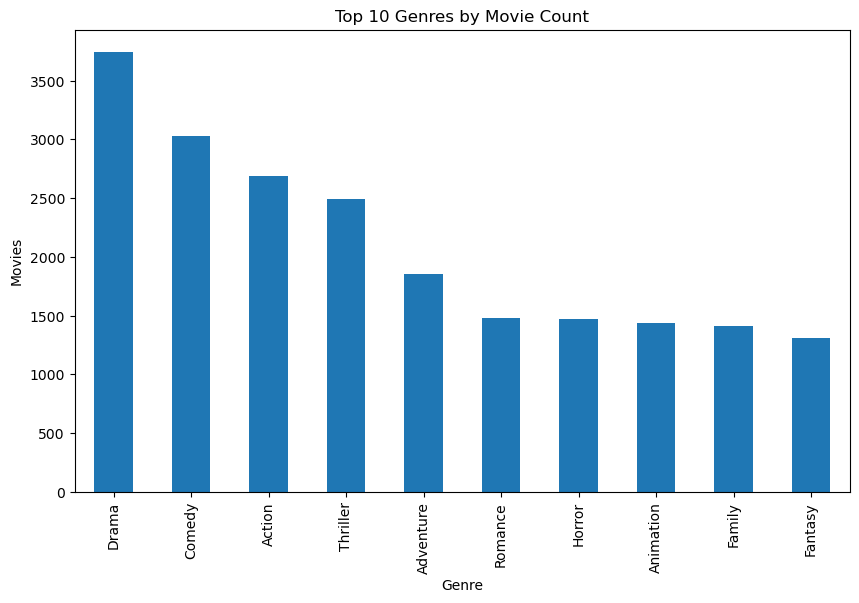

In [59]:
plt.figure(figsize=(10,6))
df_genres['Genre'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Genres by Movie Count")
plt.xlabel("Genre")
plt.ylabel("Movies")
plt.show()


In [60]:
#popularity trend

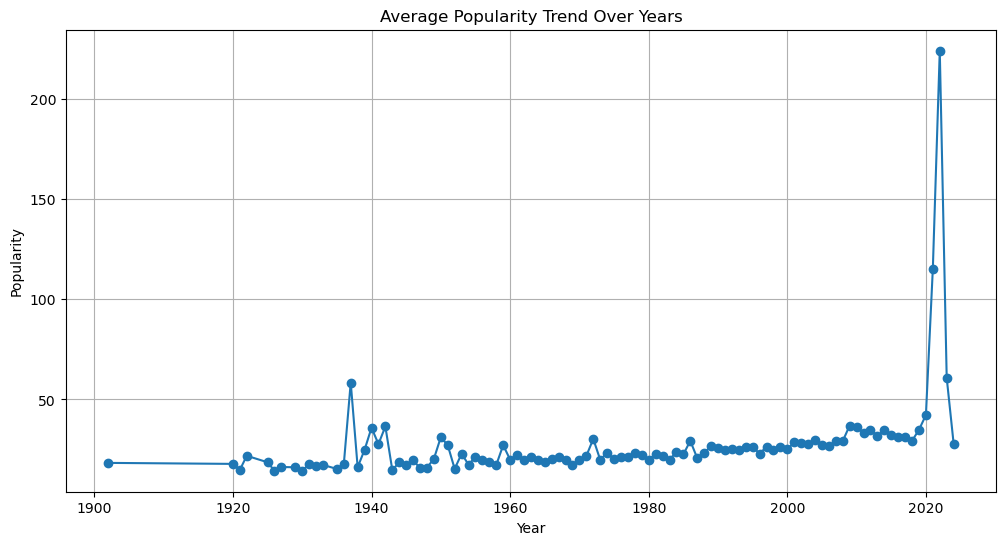

In [61]:
df_cleaned.groupby('Year')['Popularity'].mean().plot(
    figsize=(12,6), marker='o'
)
plt.title("Average Popularity Trend Over Years")
plt.xlabel("Year")
plt.ylabel("Popularity")
plt.grid(True)
plt.show()
